# **Data representations for neural networks**

1.3. Multidimensional Numpy arrays: Tensors.

Code samples found in the book [Deep Learning with Python, 2nd Edition (Manning Publications).](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff)

## Part of the class Advanced Methods in Data Analysis II




In [1]:
import numpy as np

**Scalars (0D tensors)**

A tensor that contains only one number is called a scalar or scalar tensor, or 0-dimensional tensor, or 0D tensor.

In [2]:
x=np.array(12)
x

array(12)

In [3]:
x/2

6.0

In the context of tensors, a dimension is often called an *axis*. The number of axes of a tensor is also called its *rank*

In [4]:
x.ndim

0

In [5]:
x.size

1

*** 

**Vectors (1D tensors)**

An array of numbers is called a vector, or **1D** tensor.

In [6]:
y=np.array([12, 3, 6, 14])

In [7]:
y.ndim

1

This 1D tensor has four entries and so is called a 4-*dimensional* vector. 

*Dimensionality* can denote either the number of entries along a specific axis (as in the case of our 4D vector) or the number of axes in a tensor (such as a 4D tensor)

In [8]:
y.size   

4

***

**Matrices (2D tensors)**

An array of vectors is a *matrix*, or **2D** tensor. A matrix has two axes.

In [9]:
w = np.array([[1, -8, 3, 3, 0],
[4, 9, 3, 24, 1],
[2, -5, 4, -12, 2]])
w

array([[  1,  -8,   3,   3,   0],
       [  4,   9,   3,  24,   1],
       [  2,  -5,   4, -12,   2]])

In [10]:
w.ndim

2

In [11]:
w.size

15

In [12]:
w.shape

(3, 5)

***

**3D tensors and higher-dimensional tensors**

If you pack matrices into a new matrix, you get a 3D tensor, which you can visually interpret as a cube of numbers.

In [13]:
z = np.array([[[-2, 4, 2, 4, 0],
[-8, 7, 3, 35, 1],
[-3, 0, -5, 6, 2]],
[[5, 9, 2, 3, 0],
[6, 5, 3, 5, 1],
[7, -7, 4, 0, 2]],
[[5, -6, 2, 3, 0],
[6, -2, 3, 3, 1],
[7, -1, 4, -7, 2]]])

z

array([[[-2,  4,  2,  4,  0],
        [-8,  7,  3, 35,  1],
        [-3,  0, -5,  6,  2]],

       [[ 5,  9,  2,  3,  0],
        [ 6,  5,  3,  5,  1],
        [ 7, -7,  4,  0,  2]],

       [[ 5, -6,  2,  3,  0],
        [ 6, -2,  3,  3,  1],
        [ 7, -1,  4, -7,  2]]])

In [14]:
z.ndim

3

In [15]:
z.size

45

In [16]:
z.shape

(3, 3, 5)

By packing 3D tensors in an array, you can create a 4D tensor, and so on. In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data.

A tensor is defined by three key attributes:

* Number of axes (rank)


* Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().


* Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. 

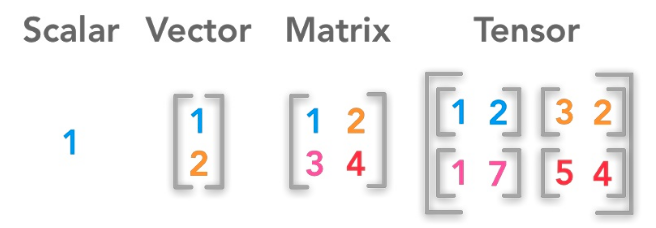

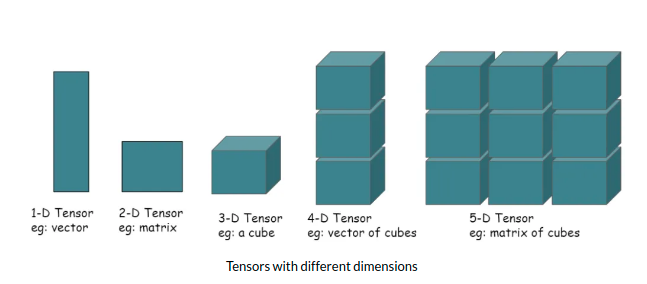

In [17]:
from keras.datasets import mnist
(X_train_image, y_train_labels), (X_test_image, y_test_labels) = mnist.load_data()

In [18]:
dim=X_train_image.ndim
shape=X_train_image.shape
typ=X_train_image.dtype
print(dim)
print(shape)
print(typ)

3
(60000, 28, 28)
uint8


***

**Manipulating tensors in Numpy**

Selecting specific elements in a tensor is called *tensor slicing*

In [19]:
a_slice = X_train_image[10:100]
print(a_slice.shape)

(90, 28, 28)


Equivalently

In [22]:
a1_slice = X_train_image[10:100, :, :]
print(a1_slice.shape)

(90, 28, 28)


Equivalently

In [24]:
a2_slice = X_train_image[10:100, 0:28, 0:28]
print(a2_slice.shape)

(90, 28, 28)


Tensor slicing on other axis

In [25]:
axis23_slice = X_train_image[:, 14:, 14:]
print(axis23_slice.shape)

(60000, 14, 14)


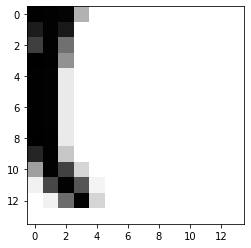

In [26]:
digit = axis23_slice[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

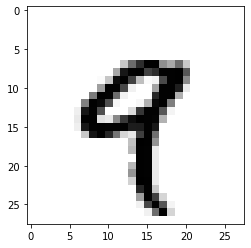

In [27]:
digit1=X_train_image[4]
plt.imshow(digit1, cmap=plt.cm.binary)
plt.show()

In [29]:
ot_slice = X_train_image[:, 7:-10, 7:-10]
print(ot_slice.shape)

(60000, 11, 11)


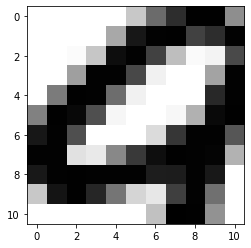

In [30]:
digit2=ot_slice[4]
plt.imshow(digit2, cmap=plt.cm.binary)
plt.show()

***

**The notion of data batches**

In [31]:
batch = X_train_image[:128]
print(batch.shape)

(128, 28, 28)


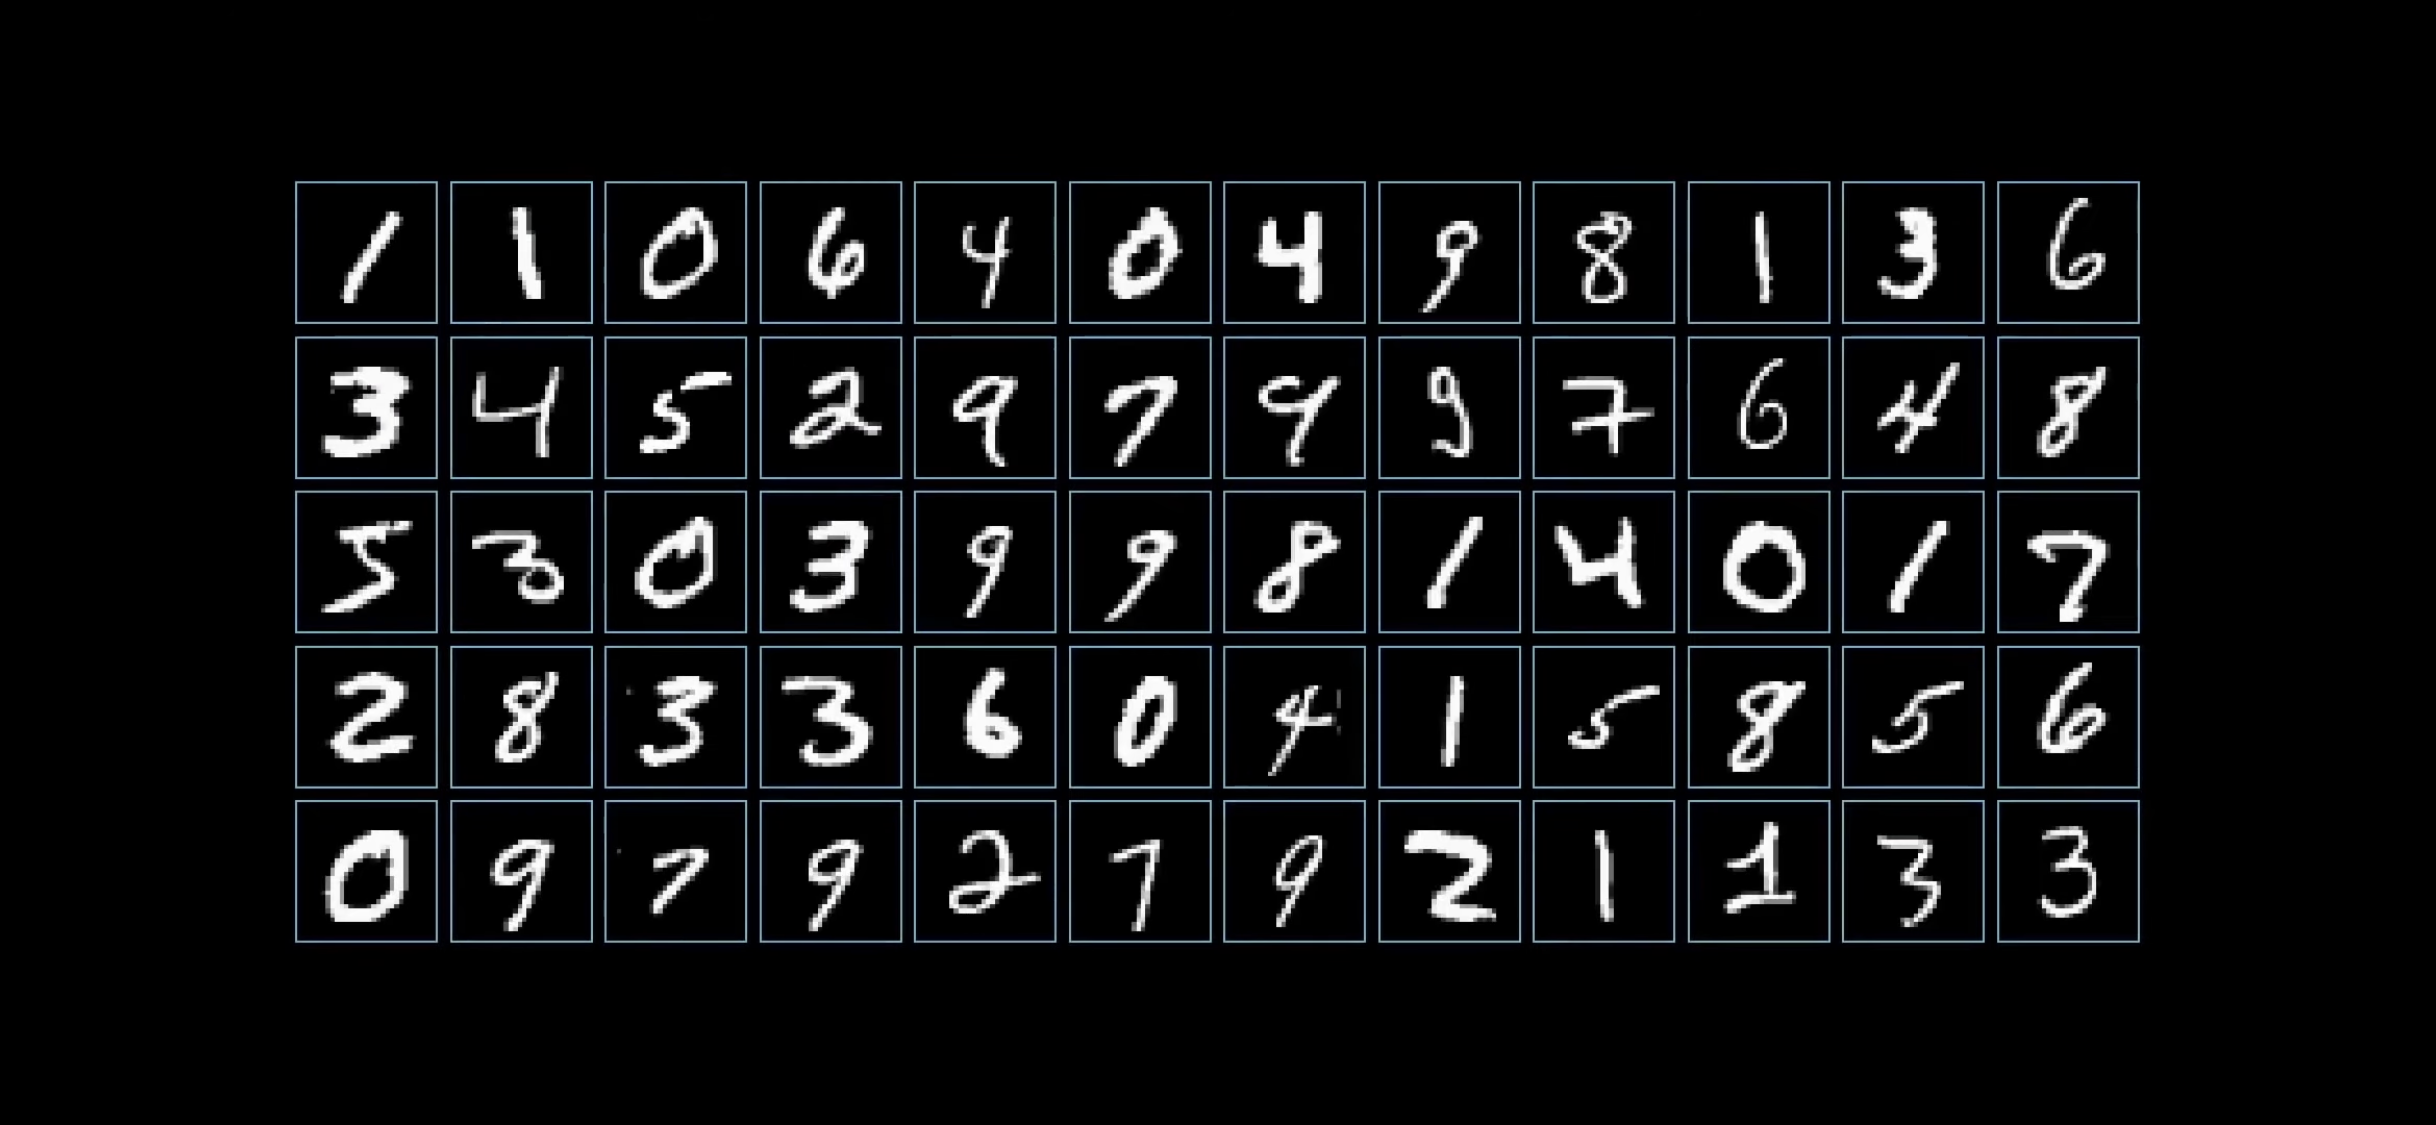

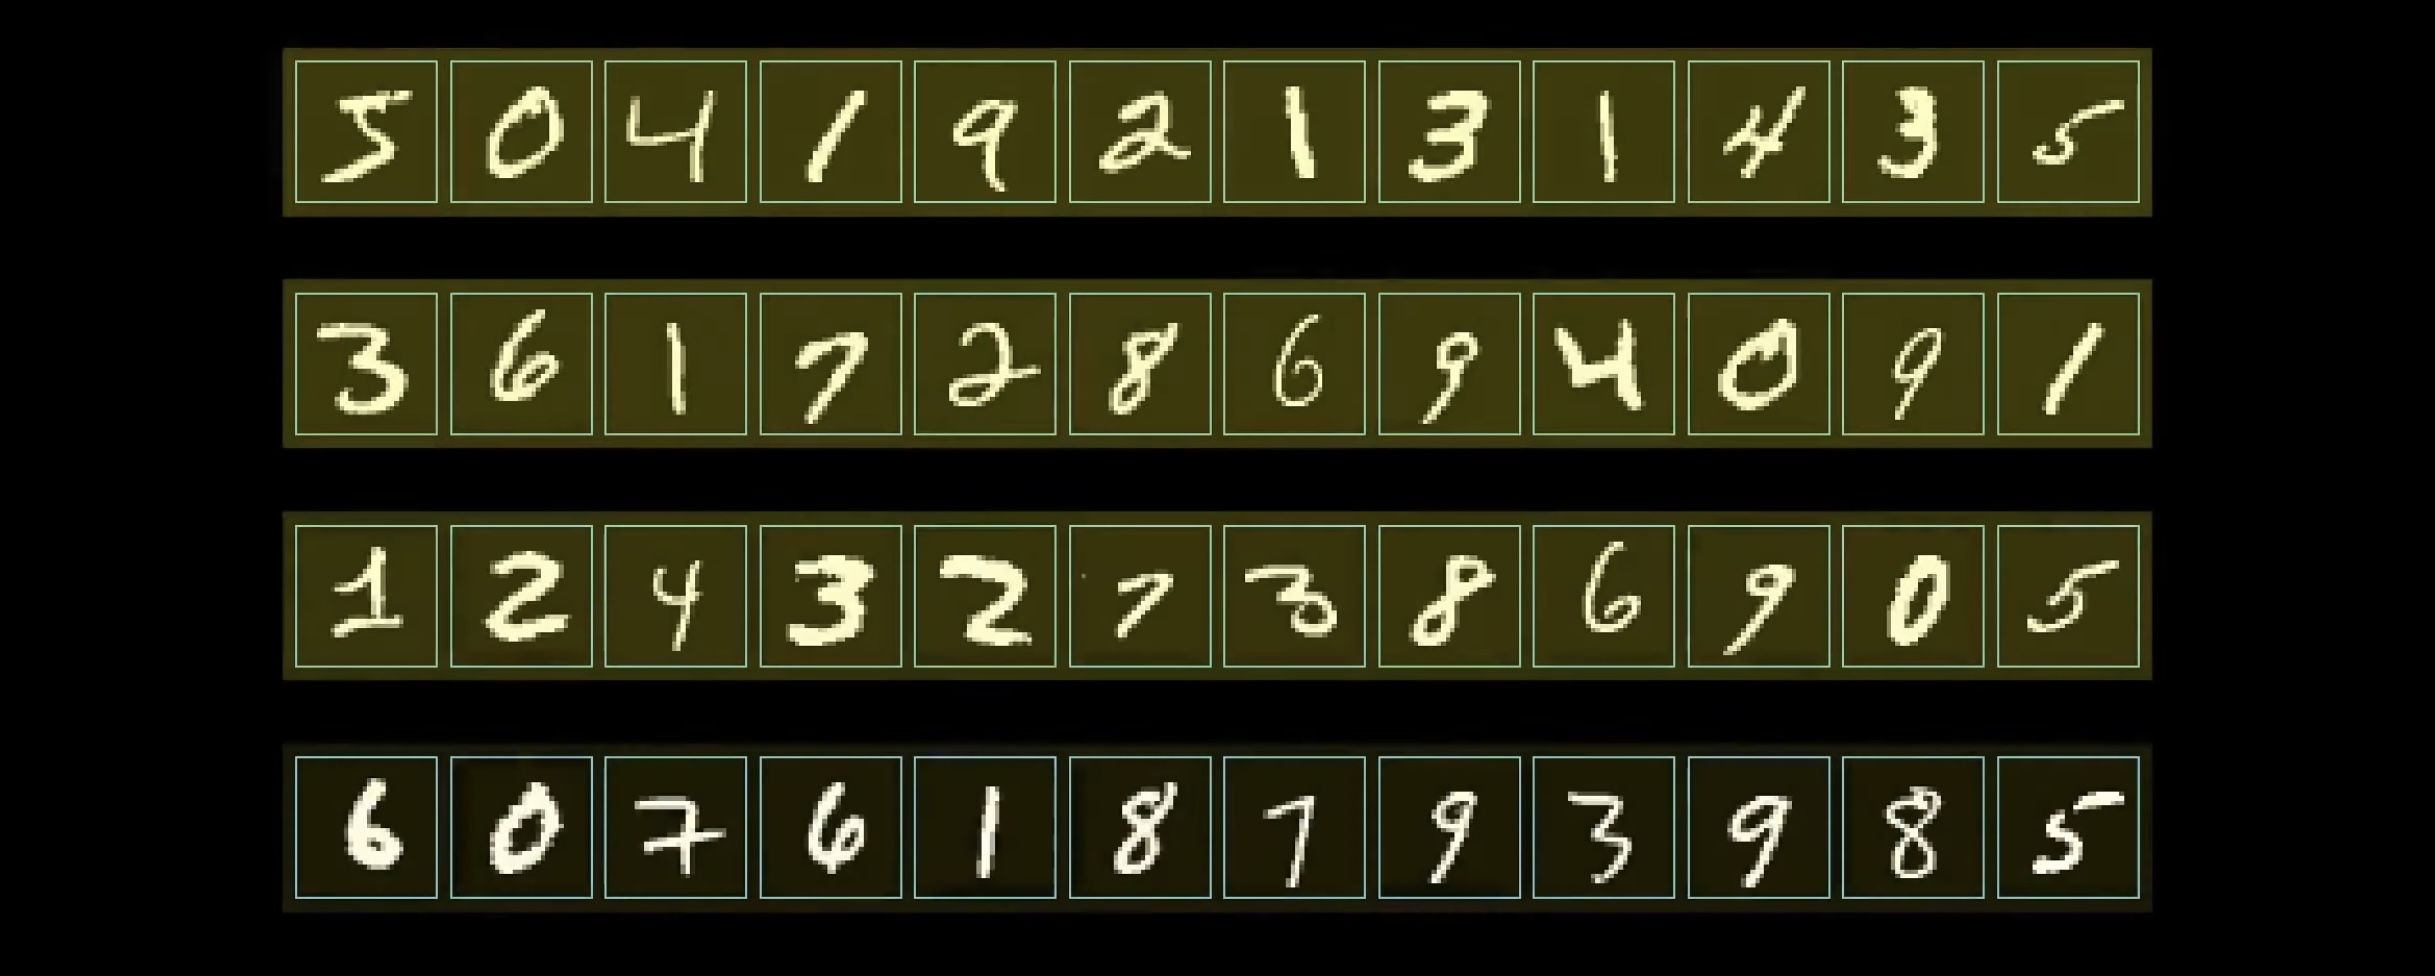

***

**Real-world examples of data tensors**

* Vector data—2D tensors of shape (samples, features)


* Timeseries data or sequence data—3D tensors of shape (samples, timesteps, features)


* Images—4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)


* Video—5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

In [32]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

In [33]:
print(x_train_original.shape)

(50000, 32, 32, 3)


In [34]:
print(x_train_original.ndim)

4


In [35]:
print(x_train_original.dtype)

uint8


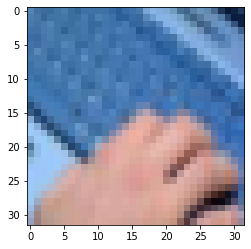

In [36]:
image_c = x_train_original[10]
import matplotlib.pyplot as plt
plt.imshow(image_c, cmap=plt.cm.binary)
plt.show()

**Image data**

Grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a onedimensional color channel for grayscale images

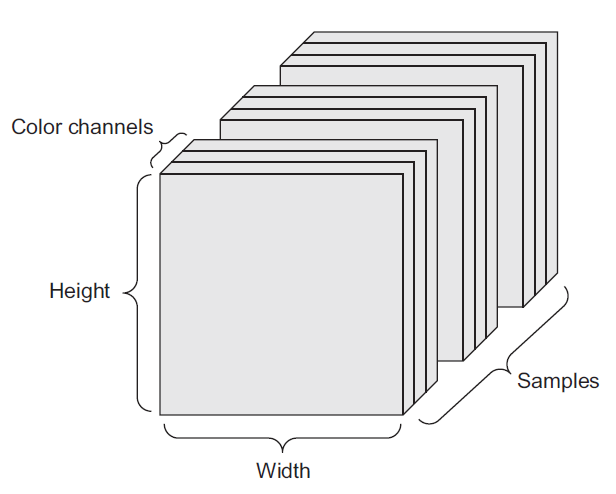

**Timeseries data or sequence data**

Each sample can be encoded as a sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D tensor.

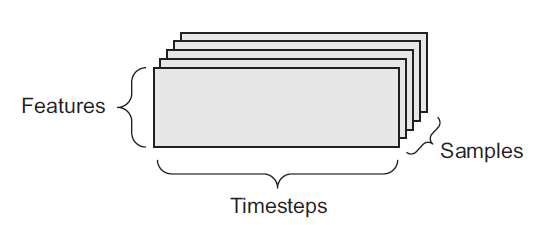

**Vector data**

The first axis is the samples axis and the second axis is the features axis

**Video data**


Video data is one of the few types of real-world data for which you’ll need 5D tensors. A video can be understood as a sequence of frames, each frame being a color image.

Each frame can be stored in a 3D tensor (height, width, color_depth). 

A sequence of frames can be stored in a 4D tensor (frames, height, width, color_depth). 

A batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth).

******

# **Tensor operations**

*keras.layers.Dense(512, activation='relu')*

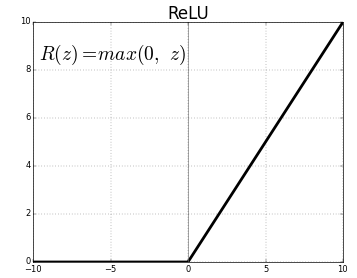

*output = relu(dot(W, input) + b),* where W is a 2D tensor and b is a vector 

In [37]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [38]:
x=np.array([[1,2,3,-1],[2,-3,4,6]])

naive_relu(x)

array([[1, 2, 3, 0],
       [2, 0, 4, 6]])

**Broadcasting**

In [39]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
print(x.shape)
print(y.shape)
print(z.shape)

(64, 3, 32, 10)
(32, 10)
(64, 3, 32, 10)


**Tensor dot**

In [40]:
x_1=np.array([1, 2])
y_1=np.array([2, 1])

z=np.dot(x_1, y_1)
print(z)

4


In [41]:
m_1=np.array([[1, 2 ],[4, 3]])

m_2=([[1,4], [2,1]])

m_f=np.dot(m_1, m_2)
print(m_f)

[[ 5  6]
 [10 19]]


In [42]:
m_1.shape

(2, 2)

In [43]:
x_1.shape

(2,)

In [44]:
product1=np.dot(x_1,m_1)
print(product1)
print(product1.shape)

[9 8]
(2,)


In [45]:
a = np.array([[ 0,  0,  0],
           [10, 10, 10],
           [20, 20, 20],
           [30, 30, 30]])
b = np.array([1, 2, 3])
a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [46]:
c = np.array([1.0, 2.0, 3.0, 4.0])

a+c

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

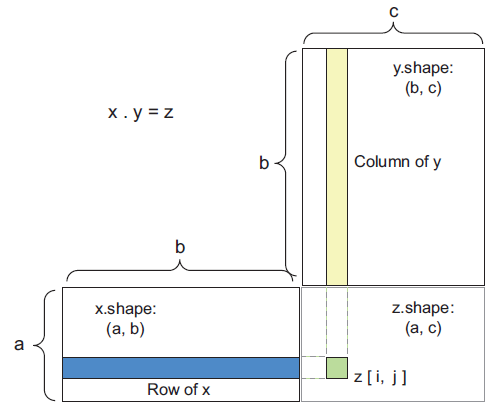

**Tensor reshaping**

Reshaping a tensor means rearranging its rows and columns to match a target shape.

In [47]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [48]:
x_1= x.reshape((6, 1))
print(x_1)
print(x_1.shape)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
(6, 1)


**A Geometric interpretation of deep learning**

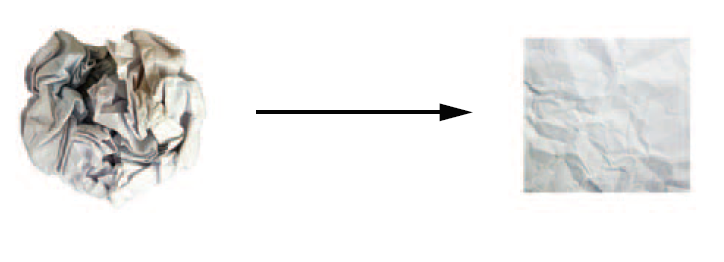